In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
# Previous cell doesn't add this, so done manually
sys.path.append('C:\\Users\\bde2002.53381\\Desktop\\master-thesis')

In [3]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import sklearn
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
import random
from datetime import date
import datetime as DT
from datetime import datetime
import plotly.graph_objects as go
from sklearn.pipeline import Pipeline
from collections import Counter
from matplotlib import pyplot

from quality_evaluation.predictive_metrics import *

In [4]:
## Assuming that data is prepared:
# - target variable is added and last column
# - variables are added (age) and removed (dates, vital status)
# - categorical variables are encoded appropriatley (ordinal vs nominal)
# - missing values are handled appropriately
# - dummy columns to be dropped are specified outside of function or during preparation

In [5]:
# Load the original and validation dataframes
df_ori = pd.read_csv("C:\\Users\\bde2002.53381\\Desktop\\master-thesis\\experiments\\data\\data_prepared_for_predictive_metrics\\df_ori_2_binned_p.csv") # This is the original data WITHOUT the holdout validation set
df_ori_val = pd.read_csv("C:\\Users\\bde2002.53381\\Desktop\\master-thesis\\experiments\\data\\data_prepared_for_predictive_metrics\\df_val_2_binned_p.csv")

In [6]:
epsilon_names = ['10','1','0_1','0_01','0_001']
ms_privacy_levels = []
pb_privacy_levels = []

g = globals()

# The following cells lead to a list (e.g. syn_10) with all the versions of that privacy level, 
# and then to a list privacy_levels that contains all these sublists of the different privay levels with their versions

In [7]:
# Load ms dataframes for dataset 2
for epsilon in epsilon_names:
    syn_name = 'ms_syn_{}'.format(epsilon)
    g[syn_name] = []
    for versie in range(1,6):
        df = pd.read_csv("C:\\Users\\bde2002.53381\\Desktop\\master-thesis\\experiments\\data\\data_prepared_for_predictive_metrics\\ms\\ms_df_syn_2_e{}_v{}_p.csv".format(epsilon, versie))
        g[syn_name].append(df)
    ms_privacy_levels.append(g[syn_name])

In [8]:
# Load pb dataframes for dataset 2
for epsilon in epsilon_names:
    syn_name = 'pb_syn_{}'.format(epsilon)
    g[syn_name] = []
    for versie in range(1,6):
        df = pd.read_csv("C:\\Users\\bde2002.53381\\Desktop\\master-thesis\\experiments\\data\\data_prepared_for_predictive_metrics\\pb\\pb_df_syn_2_e{}_v{}_p.csv".format(epsilon, versie))
        g[syn_name].append(df)
    pb_privacy_levels.append(g[syn_name])

In [9]:
# Dropdummies and num_vars should be specified or can be left None if already taken care of during preperation
dropdummies = ['stage_2A', 'subloc_7', "diagnosis_age_71-90", "lymph_pos_0"]
num_vars = ['tum_differentiatiegraad_code', 'pat_geslacht_code']
models = [LogisticRegression(), DecisionTreeClassifier()]

In [10]:
# Do for one DP algorithm at a time
privacy_levels = pb_privacy_levels

pb_TO_TB_ORI, pb_TO_TB, pb_TO_TB_ERRORS, pb_SD, pb_SD_ERRORS = TO_TBmodels(models, df_ori, privacy_levels, df_ori_val, dropdummies=None, num_vars=num_vars)

Applied model is LogisticRegression
Numerical variables scaled: ['tum_differentiatiegraad_code', 'pat_geslacht_code']
Accuracy on data that trained the model: 0.7538577983821373
Numerical variables scaled: ['tum_differentiatiegraad_code', 'pat_geslacht_code']
Prediction accuracy of synthetic data: 0.7337527792232367
Prediction accuracy of synthetic data: 0.7349070438525948
Prediction accuracy of synthetic data: 0.7345664411750792
Prediction accuracy of synthetic data: 0.7353044136430295
Prediction accuracy of synthetic data: 0.7354463314253276
TO-TB accuracy difference with same training data: 0.019062396518283675 with standard deviation: 0.0006057641763461414
Support Distance not applicable
Numerical variables scaled: ['tum_differentiatiegraad_code', 'pat_geslacht_code']
Prediction accuracy of synthetic data: 0.6339656558966839
Prediction accuracy of synthetic data: 0.6305123231940962
Prediction accuracy of synthetic data: 0.6303987889682577
Prediction accuracy of synthetic data: 0.62

total number of samples is: 105695
total number of ori rules is: 28
total number of rules that syn follows from ori are: 21
Both datasets use the same leaf nodes: False
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
Support distance: 0.013993093334594826
Prediction accuracy of synthetic data: 0.6197738776668716
total number of samples is: 105695
total number of ori rules is: 28
total number of rules that syn follows from ori are: 21
Both datasets use the same leaf nodes: False
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf n

subloc_4 present in original data, thus added to synthetic data with value 0
stage_1 present in original data, thus added to synthetic data with value 0
stage_3 present in original data, thus added to synthetic data with value 0
total number of samples is: 105695
total number of ori rules is: 28
total number of rules that syn follows from ori are: 7
Both datasets use the same leaf nodes: False
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
l

In [11]:
# Do for one DP algorithm at a time
privacy_levels = ms_privacy_levels

ms_TO_TB_ORI, ms_TO_TB, ms_TO_TB_ERRORS, ms_SD, ms_SD_ERRORS = TO_TBmodels(models, df_ori, privacy_levels, df_ori_val, dropdummies=None, num_vars=num_vars)

Applied model is LogisticRegression
Numerical variables scaled: ['tum_differentiatiegraad_code', 'pat_geslacht_code']
Accuracy on data that trained the model: 0.7538577983821373
Numerical variables scaled: ['tum_differentiatiegraad_code', 'pat_geslacht_code']
Prediction accuracy of synthetic data: 0.5120488197171106
Prediction accuracy of synthetic data: 0.5083211126354132
Prediction accuracy of synthetic data: 0.5089550120630115
Prediction accuracy of synthetic data: 0.5103741898859927
Prediction accuracy of synthetic data: 0.5104214958134254
TO-TB accuracy difference with same training data: 0.24383367235914666 with standard deviation: 0.0012979284472750606
Support Distance not applicable
Numerical variables scaled: ['tum_differentiatiegraad_code', 'pat_geslacht_code']
Prediction accuracy of synthetic data: 0.5108945550877525
Prediction accuracy of synthetic data: 0.5115662992572969
Prediction accuracy of synthetic data: 0.5111216235394295
diagnosis_age_0-20 present in original data,

total number of samples is: 105695
total number of ori rules is: 28
total number of rules that syn follows from ori are: 21
Both datasets use the same leaf nodes: False
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
Support distance: 0.011771742142147556
Prediction accuracy of synthetic data: 0.49892615544727753
total number of samples is: 105695
total number of ori rules is: 28
total number of rules that syn follows from ori are: 21
Both datasets use the same leaf nodes: False
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf 

total number of samples is: 105695
total number of ori rules is: 28
total number of rules that syn follows from ori are: 13
Both datasets use the same leaf nodes: False
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
Support distance: 0.025866881120204365
diagnosis_age_0-20 present in original data, thus added to synthetic data with value 0
Prediction accuracy of synthetic data: 0.49684469464023845
d

total number of samples is: 105695
total number of ori rules is: 28
total number of rules that syn follows from ori are: 4
Both datasets use the same leaf nodes: False
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not r

subloc_0 present in original data, thus added to synthetic data with value 0
subloc_3 present in original data, thus added to synthetic data with value 0
subloc_6 present in original data, thus added to synthetic data with value 0
subloc_8 present in original data, thus added to synthetic data with value 0
stage_2B present in original data, thus added to synthetic data with value 0
stage_3 present in original data, thus added to synthetic data with value 0
stage_4A present in original data, thus added to synthetic data with value 0
stage_4B present in original data, thus added to synthetic data with value 0
stage_M present in original data, thus added to synthetic data with value 0
diagnosis_age_21-50 present in original data, thus added to synthetic data with value 0
total number of samples is: 105695
total number of ori rules is: 28
total number of rules that syn follows from ori are: 4
Both datasets use the same leaf nodes: False
leaf node not reached by synthetic dataset
leaf node 

In [12]:
labels = ['very low', 'low', 'medium', 'high', 'very high']

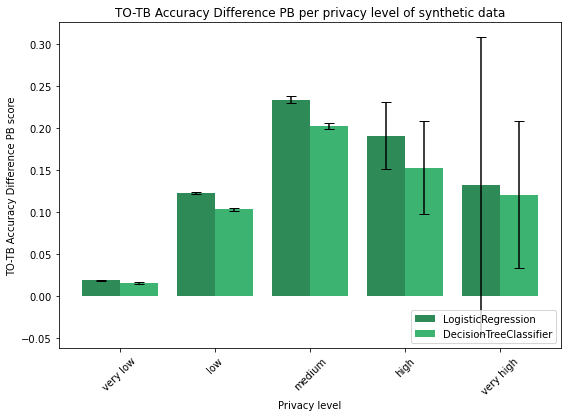

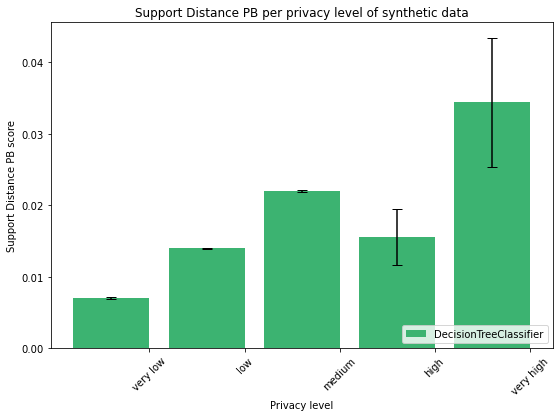

In [13]:
QMbar_one_DP_alg(QM=pb_TO_TB, QMerror = pb_TO_TB_ERRORS, QMname='TO-TB Accuracy Difference PB', labels=labels)
QMbar_one_DP_alg(QM=pb_SD, QMerror = pb_SD_ERRORS, QMname='Support Distance PB', labels=labels)

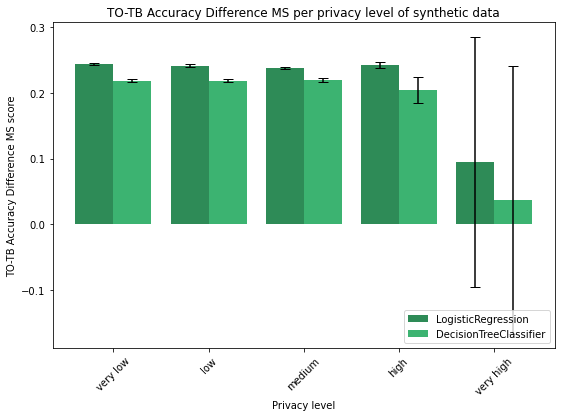

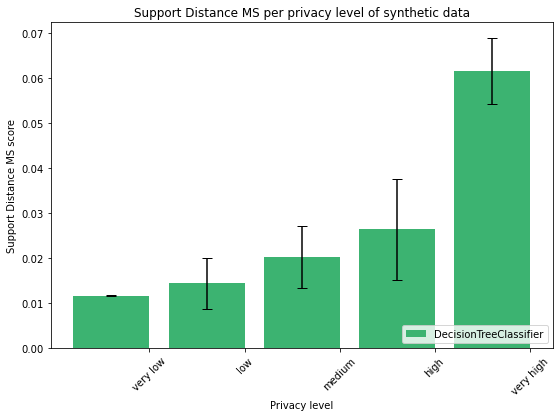

In [14]:
QMbar_one_DP_alg(QM=ms_TO_TB, QMerror = ms_TO_TB_ERRORS, QMname='TO-TB Accuracy Difference MS', labels=labels)
QMbar_one_DP_alg(QM=ms_SD, QMerror = ms_SD_ERRORS, QMname='Support Distance MS', labels=labels)

# Combined visualization

In [15]:
QM_TO_TB_ori = ms_TO_TB_ORI+pb_TO_TB_ORI
QM_TO_TB = ms_TO_TB+pb_TO_TB
QM_TO_TB_error = ms_TO_TB_ERRORS+pb_TO_TB_ERRORS

QM_SD = ms_SD+pb_SD
QM_SD_error = ms_SD_ERRORS+pb_SD_ERRORS

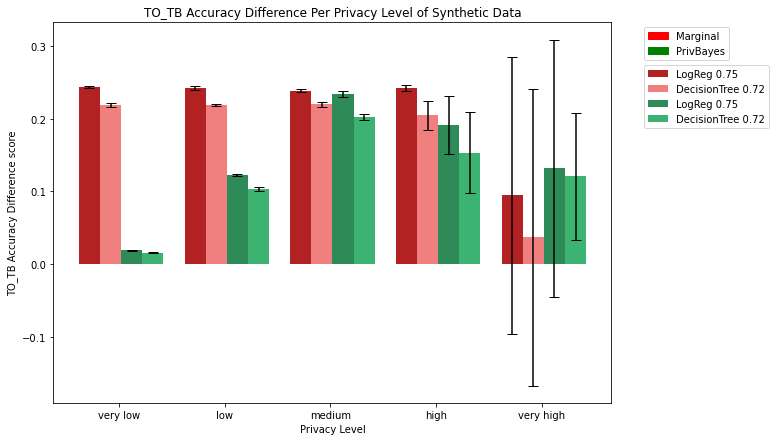

2


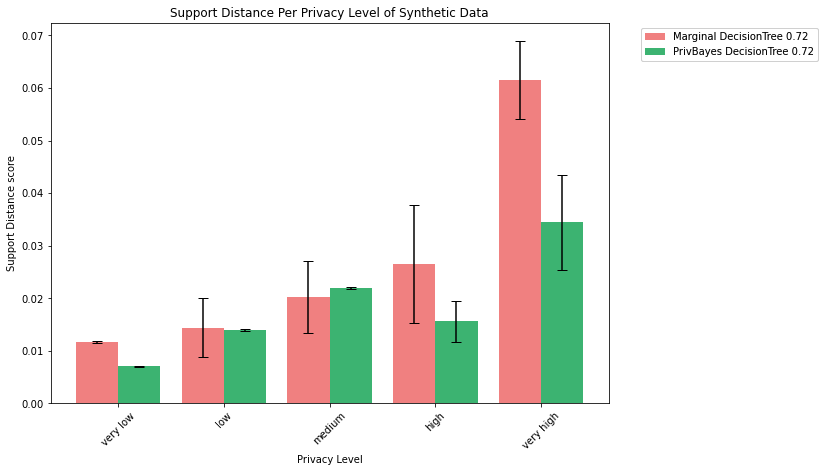

In [16]:
fig1 = QMbar_two_DP_algs(QM=QM_TO_TB, QMerror = QM_TO_TB_error, QMname='TO_TB Accuracy Difference', QMori = QM_TO_TB_ori, labels=labels)
fig1.savefig('C:\\Users\\bde2002.53381\\Desktop\\master-thesis\\experiments\\evaluation_results\\Final Result TO_TB Accuracy Difference-subset_2.png', bbox_inches='tight', dpi=100)

fig2 = SupportDistancebar(QM=QM_SD, QMerror = QM_SD_error, QMname='Support Distance', QMori = QM_TO_TB_ori, labels=labels)
fig2.savefig('C:\\Users\\bde2002.53381\\Desktop\\master-thesis\\experiments\\evaluation_results\\Final Result Support Distance-subset_2.png', bbox_inches='tight', dpi=100)